In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

### Implémentation sous Nest

Nest (http://www.nest-simulator.org/) est un autre simulateur de réseaux de neurones spécialisé dans la modélisation de larges réseaux de neurones simplifiés. Celui-ci, en revanche, ne permet pas de définir un modèle neuronal fin en saisissant explicitement des équations différentielles. Le choix est fait d'optimiser plutôt ces modèles en les compilant de façon efficace. Comme avec Brian, nous implémentons une simulation d'un simple modèle "integrate and fire" en suivant la même formalisation.

In [2]:
import nest
import matplotlib.pyplot as plt
neuron = nest.Create("iaf_neuron")

nest.GetStatus(neuron)

nest.GetStatus(neuron, "I_e")
nest.GetStatus(neuron, ["V_reset", "V_th"])

nest.SetStatus(neuron, {"I_e": 376.0})

nest.GetStatus(neuron, "I_e")

(376.0,)

In [3]:
spikedetector = nest.Create("spike_detector", 
                            params={"withgid":True, "withtime":True})

multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})

noise = nest.Create("poisson_generator", 2)
nest.SetStatus(noise, [{"rate": 8000.0}, {"rate": 15000.0}])
nest.SetStatus(neuron, {"I_e": 0.0})

syn_dict_ex = {"weight": 1.2}
syn_dict_in = {"weight": -2.0}
nest.Connect([noise[0]], neuron, syn_spec=syn_dict_ex)
nest.Connect([noise[1]], neuron, syn_spec=syn_dict_in)

nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

In [4]:
%%timeit
nest.Simulate(200.0)

1000 loops, best of 3: 1.27 ms per loop


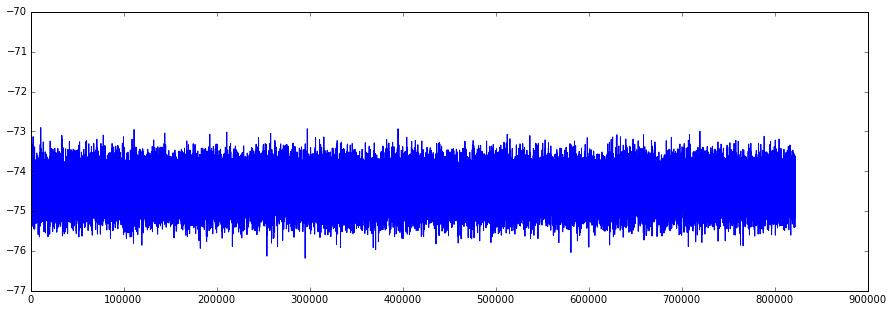

In [5]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

plt.figure(figsize=(15,5))
plt.plot(ts, Vms)

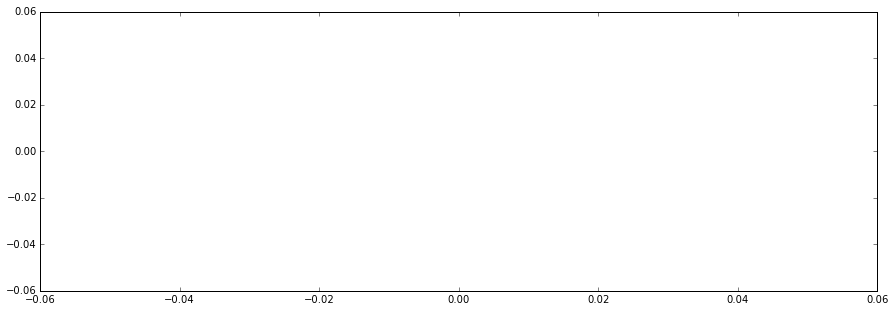

In [6]:
dSD = nest.GetStatus(spikedetector, keys='events')[0]
evs = dSD["senders"]
ts = dSD["times"]
plt.figure(figsize=(15,5))
plt.plot(ts, evs, ".")
plt.show()

## population of neurons

TODO: essayer de trouver le meme réseau que brian dans les examples de NEST pour comparer leur efficacité relative

In [7]:
pop1 = nest.Create("iaf_neuron", 1000)
nest.SetStatus(pop1, {"I_e": 376.0})
pop2 = nest.Create("iaf_neuron", 1000)
multimeter = nest.Create("multimeter", 10)
nest.SetStatus(multimeter, {"withtime": True, "record_from":["V_m"]})

In [8]:
nest.Connect(pop1, pop2, "all_to_all", syn_spec = {"weight":20.0})
nest.Connect(multimeter, pop2)

In [9]:
nest.Simulate(1000.0)

In [10]:
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

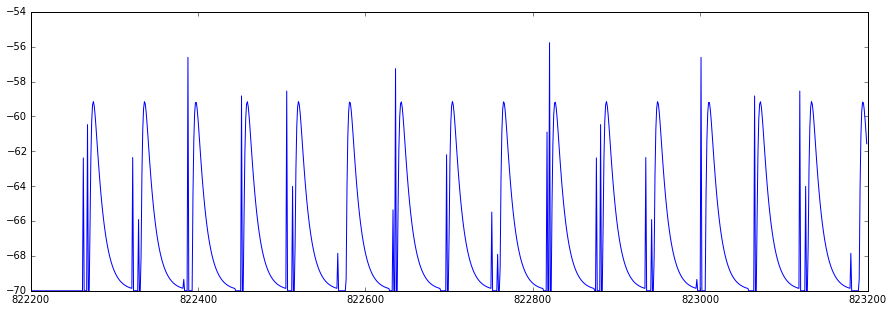

In [11]:
plt.figure(figsize=(15,5))
plt.plot(ts, Vms)